**Описание проекта:**  


Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

 - лог сервера с данными об их посещениях,
 - выгрузка их покупок за этот период,
 - рекламные расходы.

Мы узнаем:

 - откуда приходят пользователи и какими устройствами они пользуются,
 - сколько стоит привлечение пользователей из различных рекламных каналов;
 - сколько денег приносит каждый клиент,
 - когда расходы на привлечение клиента окупаются,
 - какие факторы мешают привлечению клиентов


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime, timedelta
import numpy as np

In [ ]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
purchases = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
purchases['dt'] = pd.to_datetime(purchases['dt'])

visits.info()
display(visits.head())
visits.isna().sum() # Все данные на месте, пропусков нет
visits.duplicated().sum() # Дубликатов не выявлено

print(visits['Region'].unique())
print(visits['Device'].unique())
print(visits['Channel'].unique())
# Не явных дубликатов также нет

orders.info()
display(orders.head())
orders.isna().sum() # Все данные на месте, пропусков нет
orders.duplicated().sum() # Дубликатов не выявлено

print(orders['Revenue'].unique())
# Не явных дубликатов также нет

purchases.info()
display(purchases.head())
purchases.isna().sum() # Все данные на месте, пропусков нет
purchases.duplicated().sum() # Дубликатов не выявлено

print(purchases['Channel'].unique()) # Не явных дубликатов также нет
# Названия каналов в visits и purchases идентичны
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
purchases.columns = ['dt', 'channel', 'costs']

visits['session_duration'] = (visits['session_end'] - visits['session_start']).dt.seconds

display(visits.head())
display(orders.head())
display(purchases.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


[ 4.99  5.99  9.99 49.99 19.99]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


,user_id,region,device,channel,session_start,session_end,session_duration
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,540
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,64
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,4963
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,1466
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,1445


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Были загружены блоки данных. Проведен их анализ и предобработка. Была осуществлена проверка на поиск дубликатов, форматов данных и поиск пропусков. Временные столбцы были преобразованы в формат даты. Дубликатов и пропусков в данных не обнаружно.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles  # возвращаем профили с CAC


In [ ]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):

    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions

    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу"
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result

    # расчитываем удержание
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC,
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.show()

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [ ]:
profiles = get_profiles(visits, orders, purchases)
display(profiles.head())

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
days_num = (max_date - min_date).days
print(min_date, max_date)
print('Длительность:', days_num)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


2019-05-01 00:00:00 2019-10-27 00:00:00
Длительность: 179


Вывод: Минимальная дата 1 мая 2019 года, а максимальная 27 октября 2019 года. Длительность 179 дней. Профили пользователей созданы. Информация от заказчика совпадает с теми данными, что он предоставил

#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
info_by_countries = profiles.groupby('region').agg({'payer':['count','sum']}).reset_index()
info_by_countries['percent'] = info_by_countries['payer']['sum'] / info_by_countries['payer']['count']
display(info_by_countries.sort_values(by = 'percent', ascending = False))
#display(profiles['user_id'].nunique())

region   payer         percent
                   count   sum          
3  United States  100002  6902  0.069019
1        Germany   14981   616  0.041119
2             UK   17575   700  0.039829
0         France   17450   663  0.037994

Вывод: Мы видим пользователей из 4 стран: США, Германия, Велиобритания и Франция. Общее количество пользователей 150008 человек.
Больше всего переходов из США (около 100000), около 6.9% является покупателями (6902 покупателя).

#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
users_per_gadget = profiles.groupby('device').agg({'payer':['count','sum']}).reset_index()
users_per_gadget['percent'] = users_per_gadget['payer']['sum'] / users_per_gadget['payer']['count']
display(users_per_gadget.sort_values(by = 'percent', ascending = False))

device  payer         percent
            count   sum          
1      Mac  30042  1912  0.063644
3   iPhone  54479  3382  0.062079
0  Android  35032  2050  0.058518
2       PC  30455  1537  0.050468

Вывод: Больше всего пользователей iPhone, их 54479 человек, что-либо покупают из них почти 6.2%. Пользователи Mac самые малочисленные, но они чаще всего платят около 6.3%. В целом можно сказать, что продукция Apple дороже конкурентов, поэтому эти люди могут тебе позволить покупки. Отрыв от Android почти половина процента это много, а от пользователей PC еще больше около 1.3%.

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
users_per_channel = profiles.groupby('channel').agg({'payer':['count','sum']}).reset_index()
users_per_channel['percent'] = users_per_channel['payer']['sum'] / users_per_channel['payer']['count']
display(users_per_channel.sort_values(by = 'percent', ascending = False))

channel  payer         percent
                        count   sum          
1             FaceBoom  29144  3557  0.122049
0           AdNonSense   3880   440  0.113402
9       lambdaMediaAds   2149   225  0.104700
6               TipTop  19561  1878  0.096007
5       RocketSuperAds   4448   352  0.079137
7       WahooNetBanner   8553   453  0.052964
8              YRabbit   4312   165  0.038265
3         MediaTornado   4364   156  0.035747
2              LeapBob   8553   262  0.030633
4   OppleCreativeMedia   8605   233  0.027077
10             organic  56439  1160  0.020553

Вывод: Больше всего людей пришло из канала organic около 56500 человек, но в тоже время это наименее плажеспособные люди. Всего 2% людей совершило покупку. Наиболее прибыльным каналом оказался FaceBoom. Это Топ-2 по количеству привлеченых пользователей, так и еще это люди, которые чаще всего совершают покупки, около 12.2%

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитайте общую сумму расходов на маркетинг.

In [ ]:
cost_of_mark = purchases.groupby('channel').agg({'costs':'sum'}).reset_index()
print(cost_of_mark['costs'].sum())

105497.30000000005


Вывод: Общая стоимость затрат на маркетинг в изучаемый период составляет 105497.3

#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
cost_of_mark['percent'] = cost_of_mark['costs'] / cost_of_mark['costs'].sum()
display(cost_of_mark.sort_values(by = 'costs', ascending = False))

,channel,costs,percent
6,TipTop,54751.30,0.518983
1,FaceBoom,32445.60,0.307549
7,WahooNetBanner,5151.00,0.048826
0,AdNonSense,3911.25,0.037074
4,OppleCreativeMedia,2151.25,0.020392
5,RocketSuperAds,1833.00,0.017375
2,LeapBob,1797.60,0.017039
9,lambdaMediaAds,1557.60,0.014764
3,MediaTornado,954.48,0.009047
8,YRabbit,944.22,0.008950


Вывод: Больше всего затрат было на TipTop, больше 51% ушло на этот канал. Второе место занимает FaceBoom. Эта компания показала лучшие значения по проценту привлеченных пользователей, которые совершили покупку.

#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

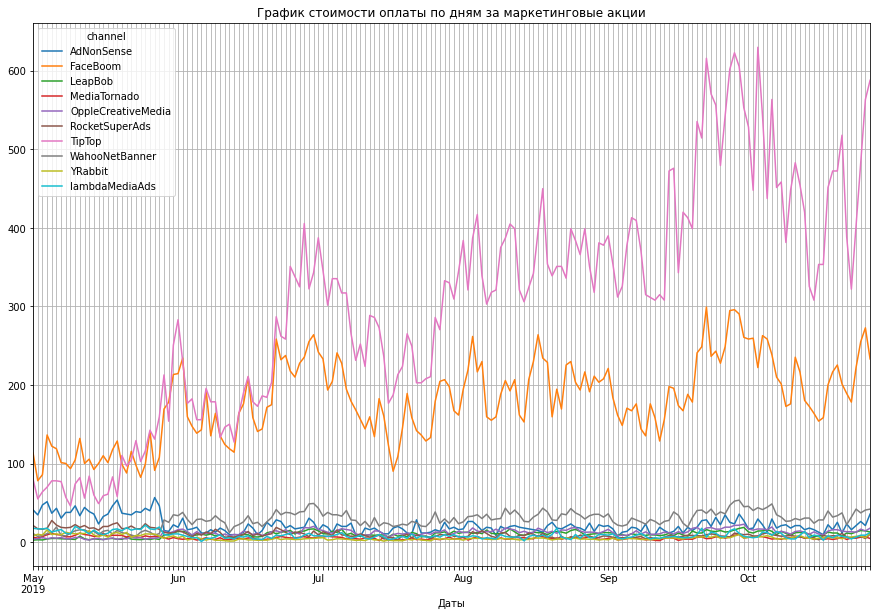

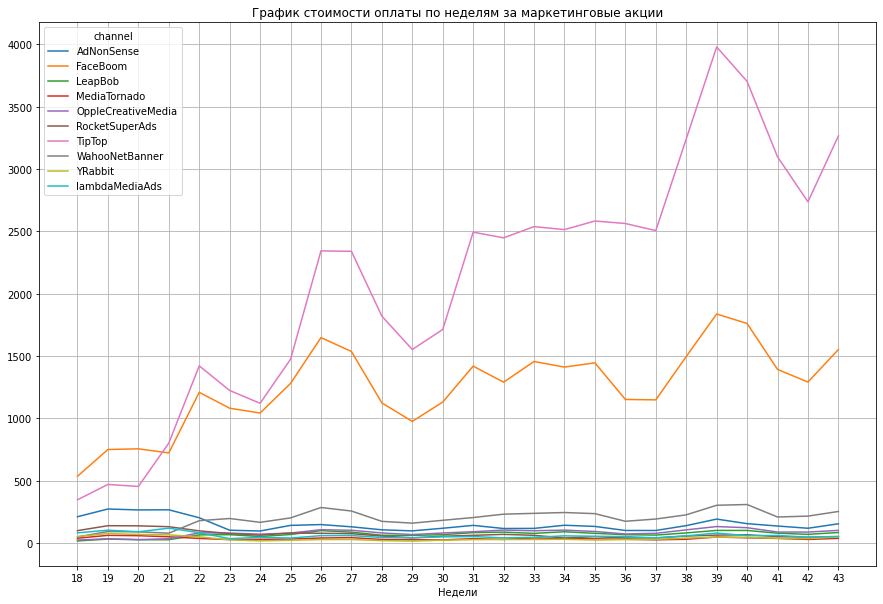

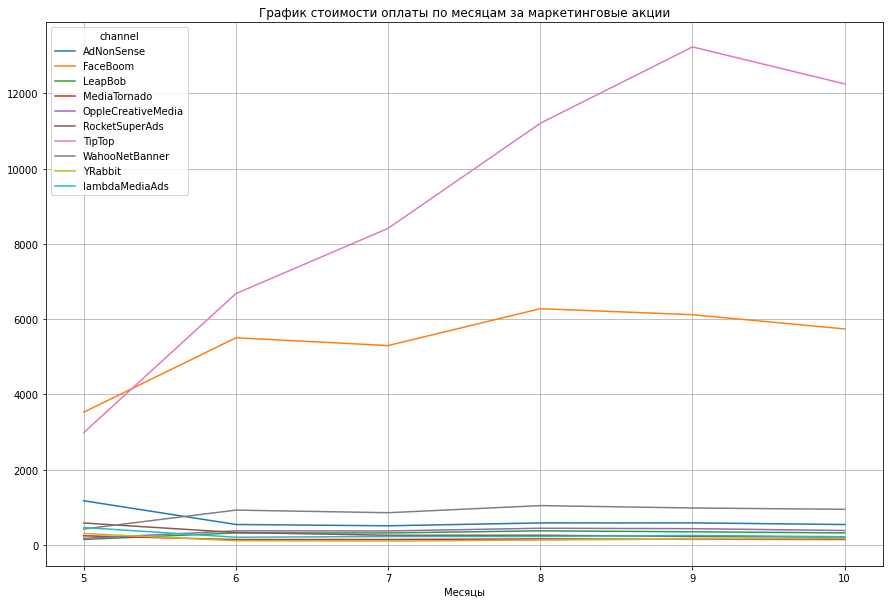

In [ ]:
#display(purchases)
purchases['weeknum'] = purchases['dt'].dt.isocalendar().week
purchases['month'] = purchases['dt'].dt.month

# Дневной график

report_by_days = purchases.pivot_table(
    index='channel', columns='dt', values='costs', aggfunc='sum')

report_by_days.T.plot(
    grid=True,
    xticks=list(report_by_days.columns.values),
    figsize=(15, 10))
plt.xlabel('Даты')
plt.title('График стоимости оплаты по дням за маркетинговые акции')
plt.show()

# Недельный график

report_by_weeks = purchases.pivot_table(
    index='channel', columns='weeknum', values='costs', aggfunc='sum')

report_by_weeks.T.plot(
    grid=True,
    xticks=list(report_by_weeks.columns.values),
    figsize=(15, 10))
plt.xlabel('Недели')
plt.title('График стоимости оплаты по неделям за маркетинговые акции')
plt.show()

# Месячный график

report_by_months = purchases.pivot_table(
    index='channel', columns='month', values='costs', aggfunc='sum')

report_by_months.T.plot(
    grid=True,
    xticks=list(report_by_months.columns.values),
    figsize=(15, 10))
plt.xlabel('Месяцы')
plt.title('График стоимости оплаты по месяцам за маркетинговые акции')
plt.show()

Посторены графики по дням, неделям и месяцам
Видем, что выделяются два агенства. По ним очень большие расходы получились. Это TipTop и FaceBoom

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [ ]:
cac = (profiles.groupby('channel')
      .agg({'acquisition_cost': 'mean'})
      .reset_index()
      .rename(columns={'acquisition_cost': 'cac'}))
display(cac.sort_values(by = 'cac', ascending = False))

cac_mean = profiles.query('channel != "organic"').agg({'acquisition_cost':'mean'})
print(cac_mean)

,channel,cac
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


acquisition_cost    1.127481
dtype: float64


Вывод: Самый большой средний САС у TipTop почти 2.8. Второе место занимает FaceBoom почти 1.11.
Средний CAC у одного пользователя 1.12

Общий вывод: Мы видим, что по затаратам выделяются два агентсва TipTop и FaceBoom. На них ушло почти 80% всего бюджета, они привлекли много пользователей и клиентов, но затраты на привлечение одного пользователя в несколько раз выше других агенств и среднего значения

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [ ]:
observation_date = max_date
horizon_date = 14

In [ ]:
# Удаялем канал organic из profiles
profiles_wo_org = profiles.query('channel != "organic"')

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

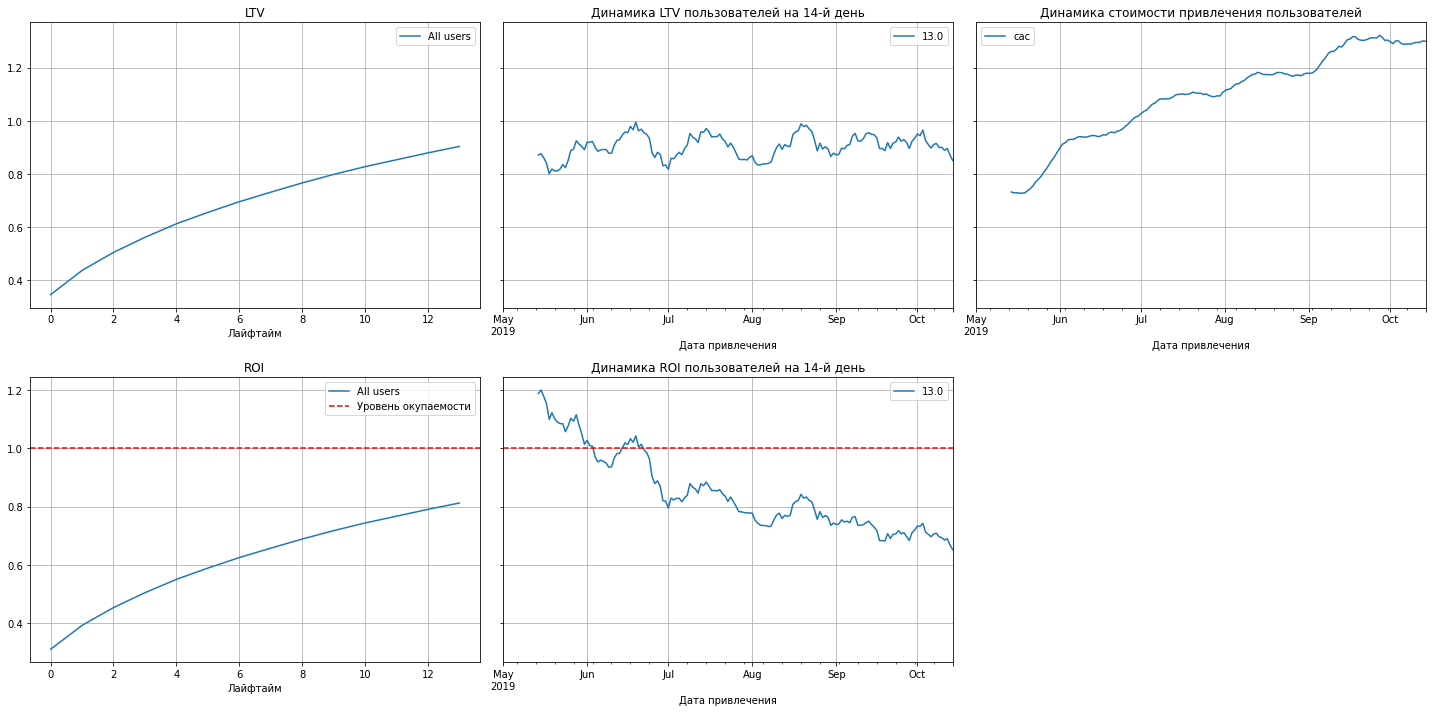

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_org, orders, observation_date, horizon_date)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=14)

Вывод:

LTV.  

Показатель LTV растет за изучаемый период, что является хорошим показателем. Доходит за 2 недели на значение почти 0,9. Если смотреть в динамике за весь период, то наблюдается коридор по данному показателю. Он ходит по определенному диапозону вверх и вниз.
   
CAC.  

Стоимость привлеченных пользователей только растет. В июне 2021 года наблюдается сильный скачок и график идет только вверх.

ROI.  

Общий ROI показывает, что затраты не окупаются за 2 недели. По динамике такая же картина, после роста цен на CAC окупаемость только снижается. Цены на привлечение вверх, а окупаемость вниз

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

##### Общий анализ

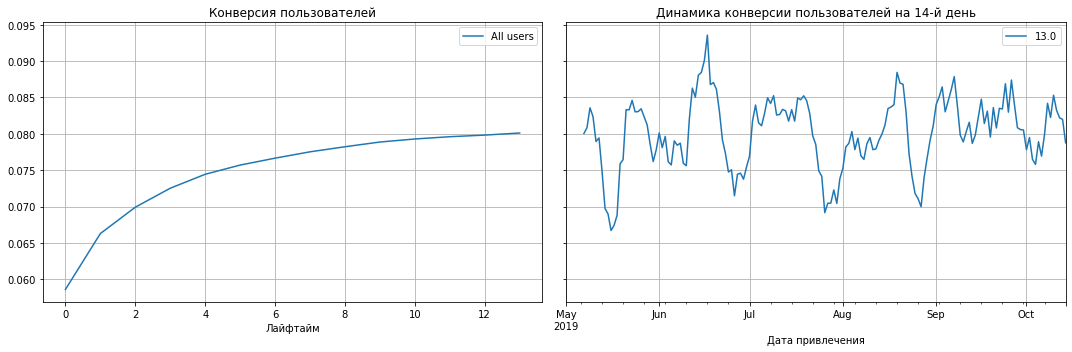

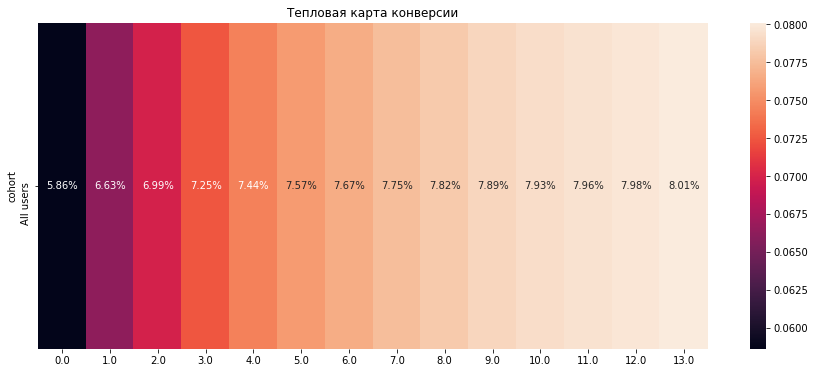

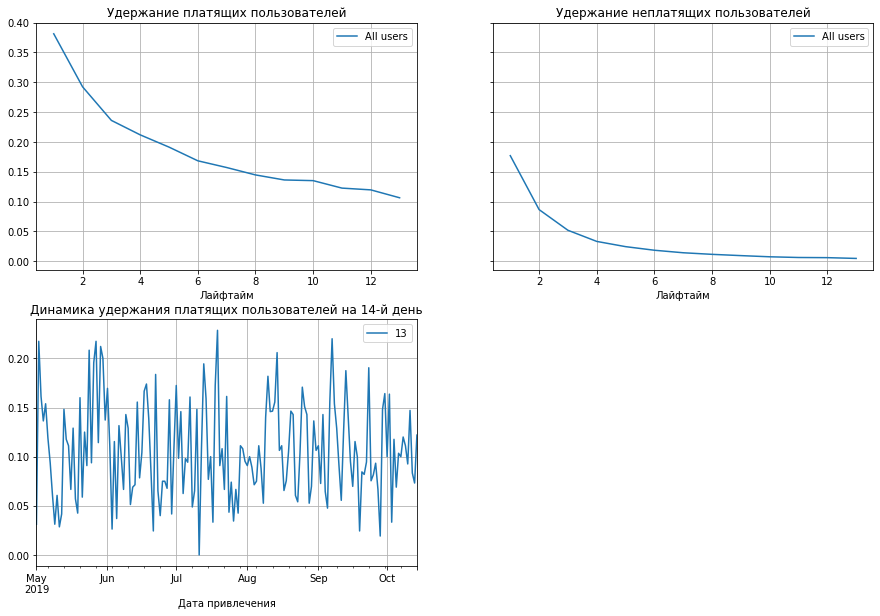

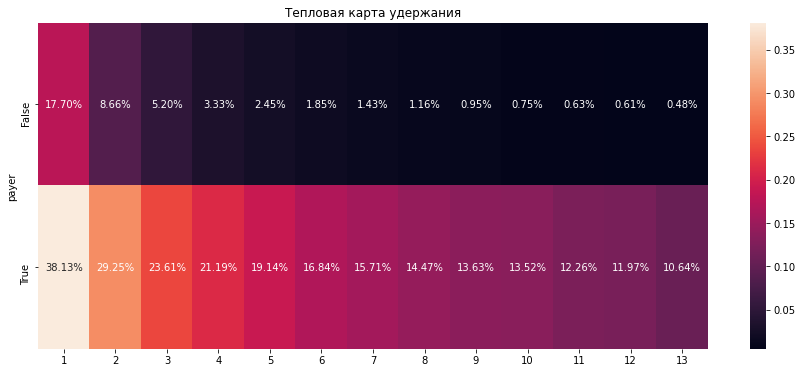

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_date)

plot_conversion(conversion, conversion_history, horizon_date, window=7)

plt.figure(figsize=(15, 6))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

retention_raw, retention, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_date)
plot_retention(retention, retention_history, 14)

plt.figure(figsize = (15, 6))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]),
            annot = True,
            fmt = '.2%'
           )
plt.title('Тепловая карта удержания')
plt.show()

Вывод:

 - Конверсия пользователей растет, это хорошо. По динамике картина похожая на динамику LTV. Коридор после июня. По тепловой карте видно, что за первый день около 6% конверсии и к концу второй недели растет до показателя 8.01%.
    
 - Графики удерживания пользователей. Мы видим, что на первый день удерживаемость пользователей самая высокая. У платящих показатель около 38% и к концу второй недели спускается до 11%. У неплатящих картина другая. На первый день также самое высокое значение около 17.7%, но к концу второй недели пользователей почти не остается около 0.5%

##### Анализ по каналам

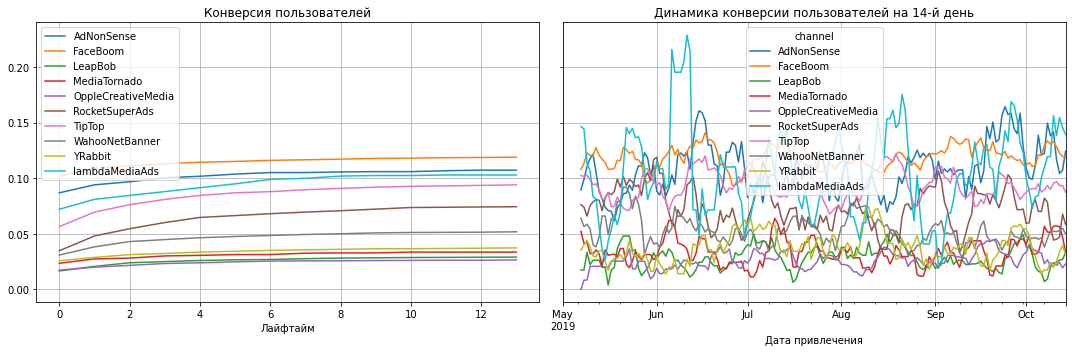

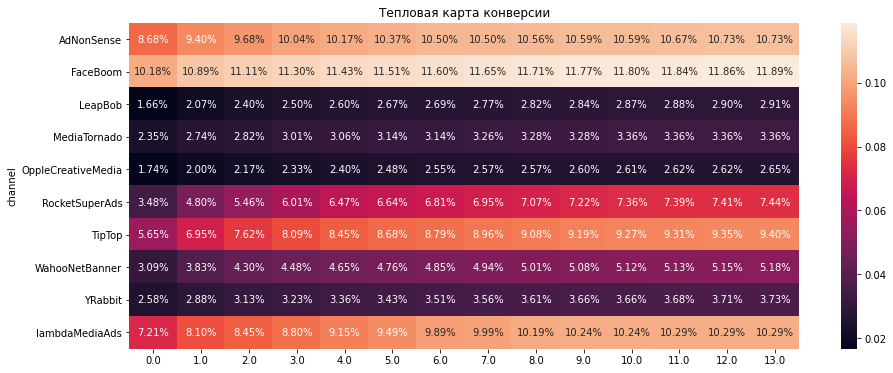

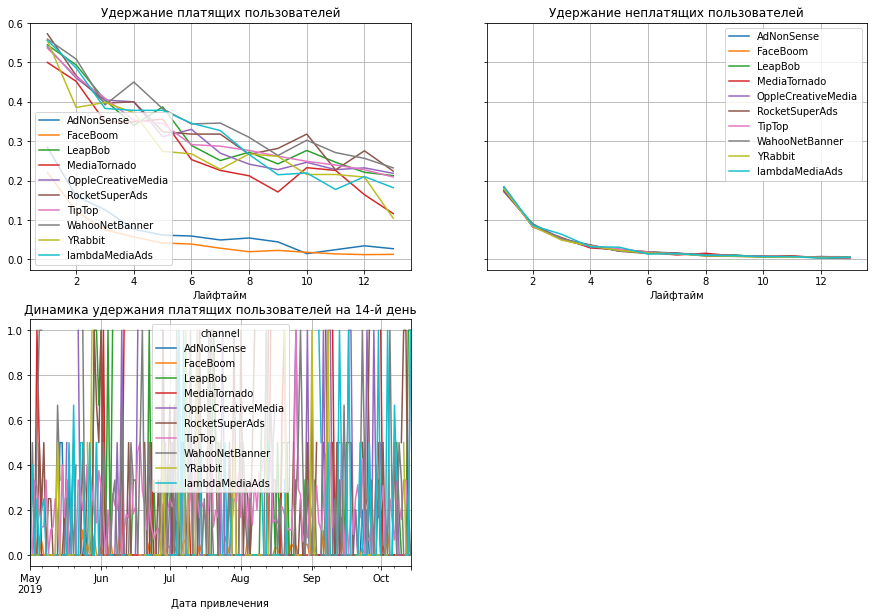

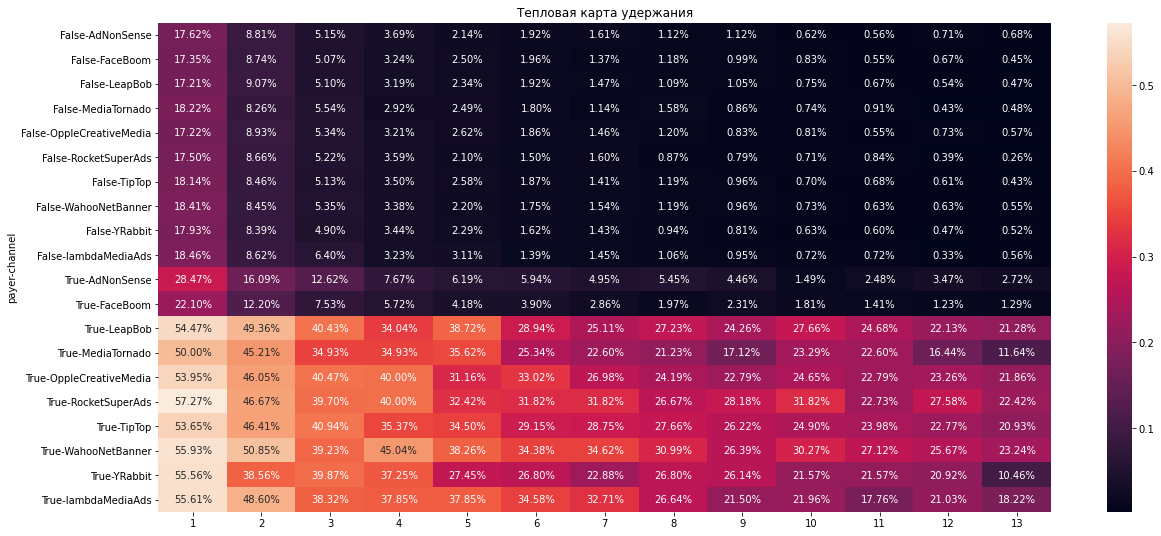

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_date, dimensions = ['channel'])

plot_conversion(conversion, conversion_history, horizon_date, window=7)

plt.figure(figsize=(15, 6))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

retention_raw, retention, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_date, dimensions = ['channel'])
plot_retention(retention, retention_history, 14)

plt.figure(figsize = (20, 9))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]),
            annot = True,
            fmt = '.2%'
           )
plt.title('Тепловая карта удержания')
plt.show()

Вывод:

- Мы видим, что лучшие значения конверсии у AdNonSence, FaceBoom, lambdaMediaAds и TipTop.Остальные показывают посредственные результаты
    
- Графики удерживания пользователей. График платящих пользователей показывает, что у AdNonSense и FaceBoom крайне плохие значения. У остальных намного лушче показатели, тяжело выделить кого-то у всех плюс минус хорошие значения и держатся они уверенно к концу 2 недели около 20% пользователей остаются с нами. По неплатящим пользователям у всех одна картина за 2 недели почти все пользователи уходят.

##### Анализ по странам

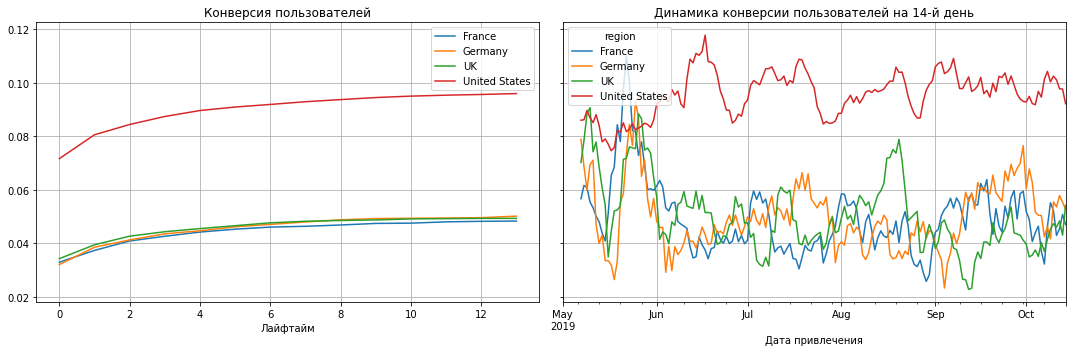

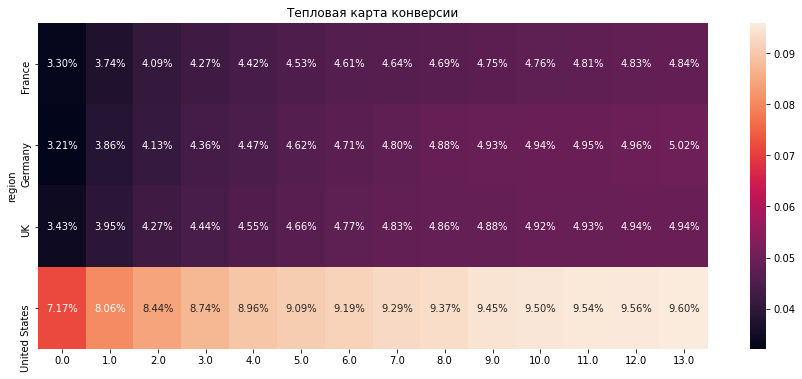

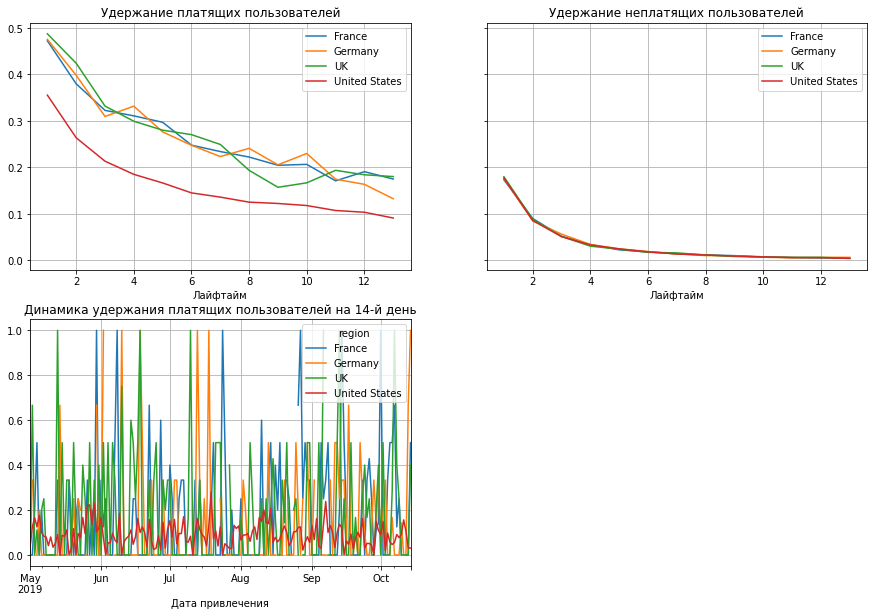

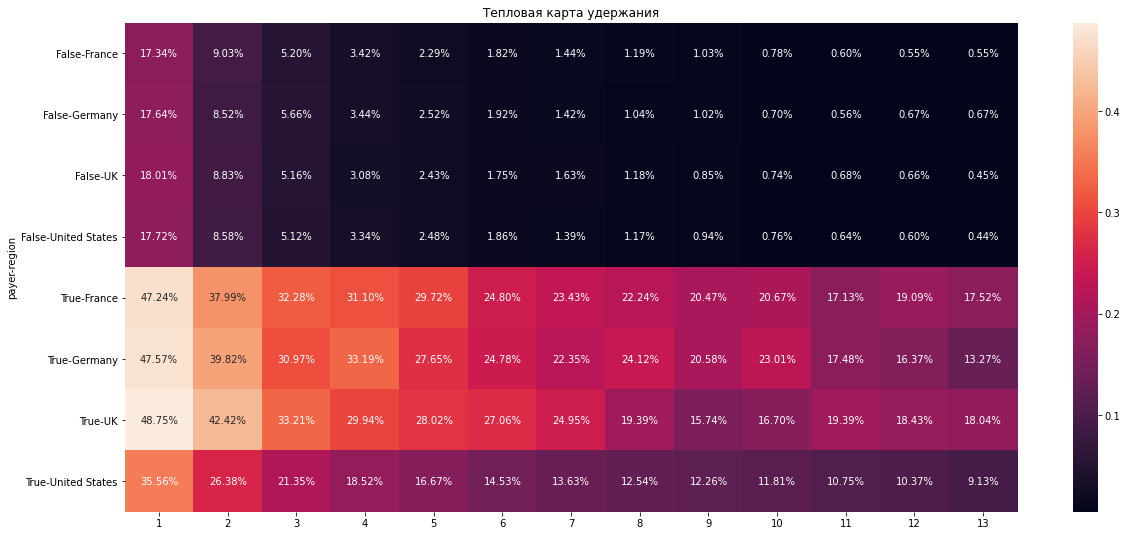

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_date, dimensions = ['region'])

plot_conversion(conversion, conversion_history, horizon_date, window=7)

plt.figure(figsize=(15, 6))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

retention_raw, retention, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_date, dimensions = ['region'])
plot_retention(retention, retention_history, 14)

plt.figure(figsize = (20, 9))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]),
            annot = True,
            fmt = '.2%'
           )
plt.title('Тепловая карта удержания')
plt.show()

Вывод:   
- В США мы видим хорошую конверсию. Значение достигает 9.6% за 2 недели. Но в США самые плохие показатели по удержанию платящих клиентов за 2 недели значение около 9%.
- По Европе мы видим среднее значение около 15% по удержанию платящих пользователей. Начало также за Европой, первые пользователи показывают значение около 48%, в то время как США 36%. По неплатящим пользователям картина одинаковая у всех регионов.

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

##### Общий анализ

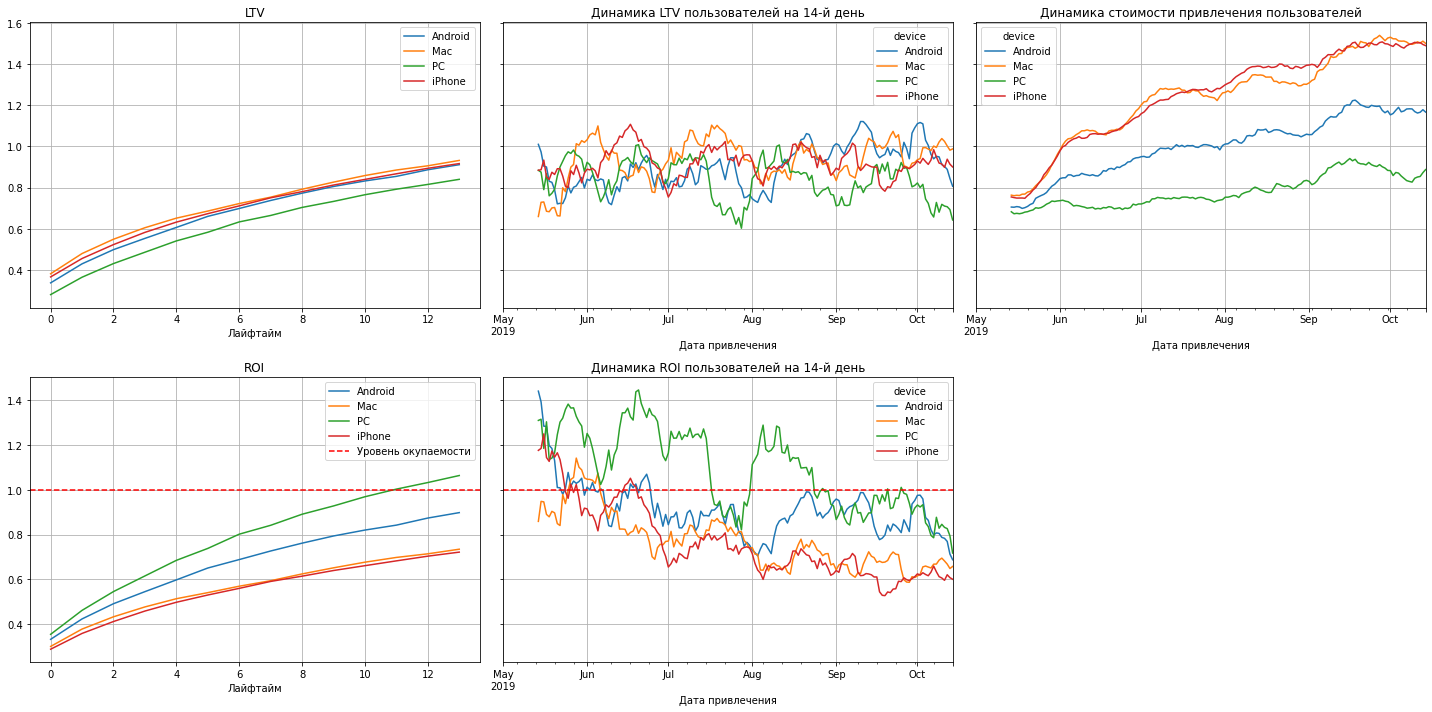

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_org, orders, observation_date, horizon_date, dimensions = ['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=14)

Вывод:

LTV.  

Данный показатель схожь почти у всех пользователей не зависимо от устройства, кроме PC. За 2 недели пользователи других платформ доходят до показателя 0.7, а PC только 0.65. По динамике наблюдается схожая картина. Пользователи PC почти всегда имеют меньшие значения, чем другие устройства.
    
CAC.
    
Пользователей PC дешевле всего привлечь и цена после июня не так сильно выросла. Дороже всего стало привлекать пользователей устройств от Apple. Mac и iPhone делят первое место. Цена на их привлечение больше всего выросла. Пользователи Android, что-то среднее между PC и Apple. На Android достаточно большое количесвто устройств и разного ценового сегмента, поэтому мы имеем богатых клиентов так и менее богатых.
    
ROI.
        
Окупаемость самая лучшая за 2 недели у PC. Второе место Android. Пользователи с устройствами Apple не окупают затраты на рекламу за 2 недели. Но в динамике ситуация была обратная. До июня все было наоборот. Не способность отбивать затраты н арекламу пользователей Apple лежит на высокой цене их привлечения.

##### Ищем, где рост цены привлечения Apple

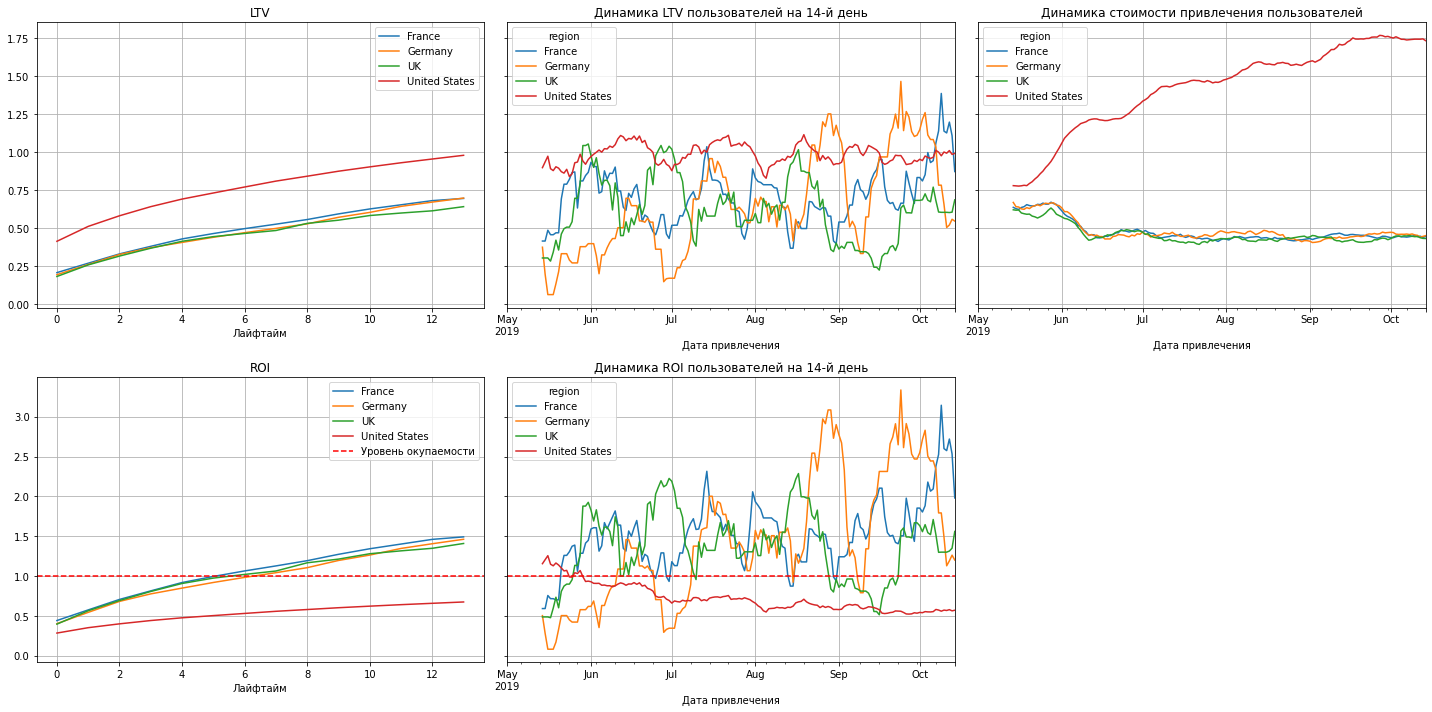

In [ ]:
prof_apple = profiles_wo_org.query('device == "iPhone" or device == "Mac"')
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(prof_apple, orders, observation_date, horizon_date, dimensions = ['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=14)

Вывод:

Очень сильно выросли цены в США. Дальше изучим у какого агенства произошел рост. А так показатели достаточно хорошие. ОКупаемость за неделю, в динамике тоже все хорошо. В Европе даже цены упали на привлечение пользователей с Apple

#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

##### Анализ по регионам

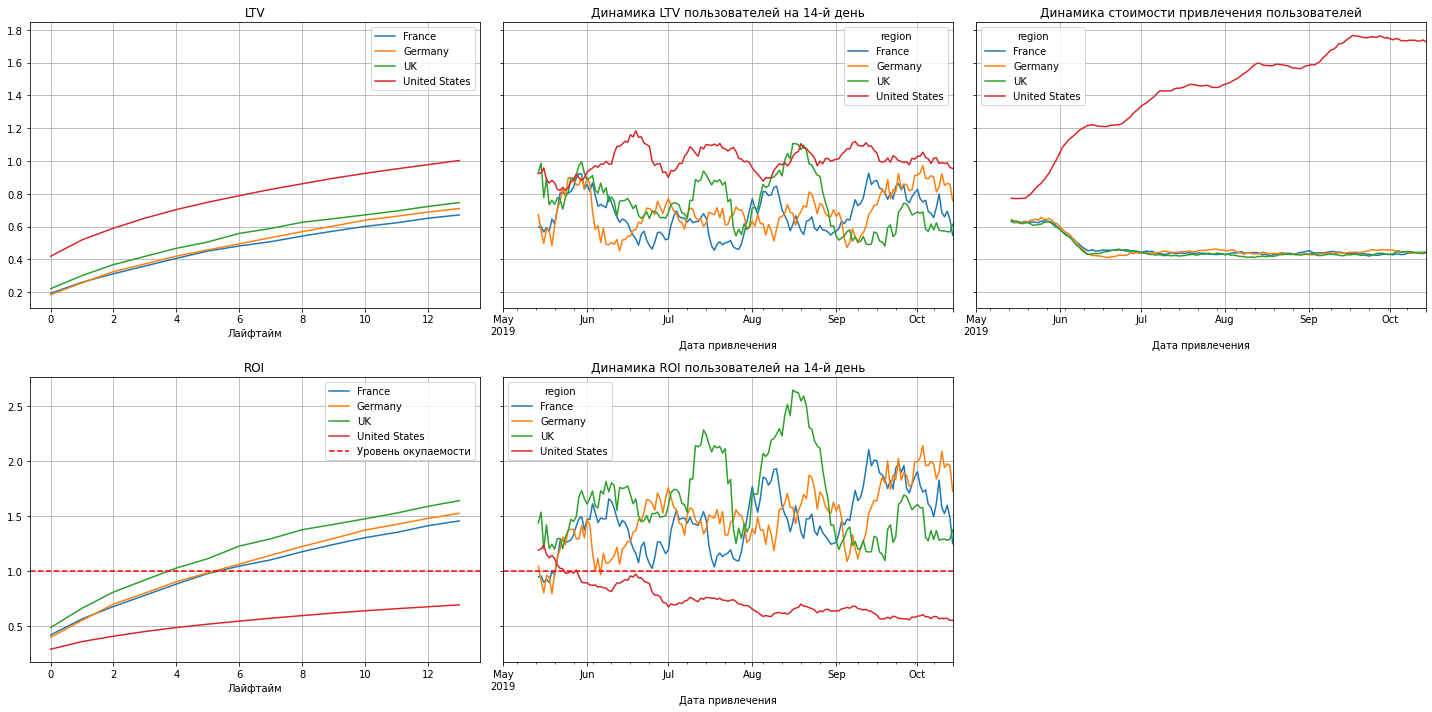

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_org, orders, observation_date, horizon_date, dimensions = ['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=14)

Вывод:

LTV.
    
LTV у пользователей из США самый большой, к концу второй недели показатель растет до значение почти 0.8. У остальных стран от 0.55 до 0.6. Если смотреть в динамике, то тут польщователи из США в лидерах. Периодами пользователи из Великобритании догоняют и обгоняют людей из США.

CAC.
        
Стоимость привлечения в странах Европы плюс минус одинаковая за весь период. Даже нет значенительного роста после июня. У пользоваталей из США очень большая стоимость до июня и после повышения в июне цены сталы в разы больше.

ROI.
        
Окупаемость у Европейских стран отличная. Франция, Великобритания и Германия к концу второй недели набирают почти 2.0 и спокойно окупаются за 2-3 дня. Пользователи из США вообще не окупаются за 2 недели. Не удивительно, ведь цена на привлечение выросла достаточно сильно, в то время как в Европе она осталась прежней. В динамике наблюдается такая же картира. США до роста цены имели результат схожий с Европой, а вот после повышения показатель только вниз уходит.

##### Рассмотрим рынок США отдельно

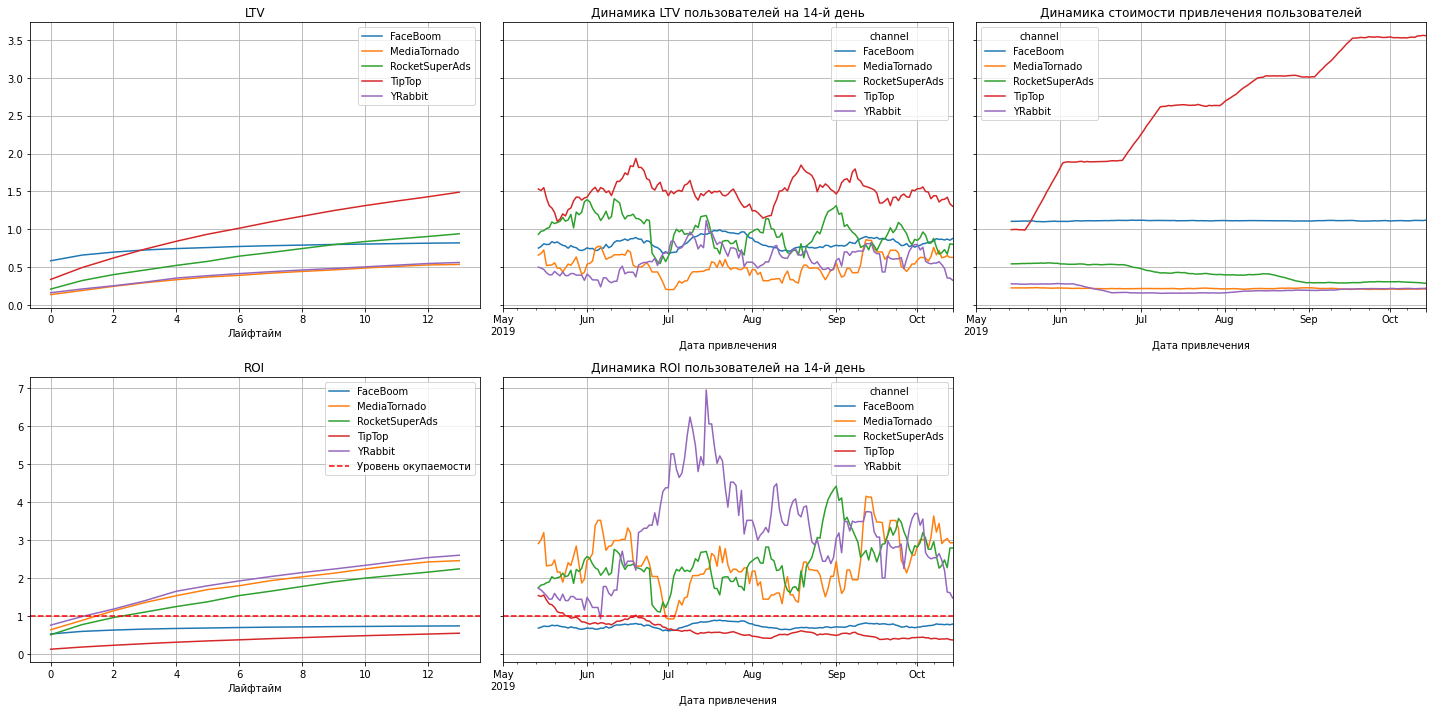

In [ ]:
prof_us = profiles_wo_org.query('region == "United States"')
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(prof_us, orders, observation_date, horizon_date, dimensions = ['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=14)

Вывод:

LTV.
    
LTV у пользователей в США хороший, цифры выше Европейских. По TipTop мы видим самый большой показатель 1.5. В динамике также видим, что это агенство выделяется своими значениями

CAC.
        
Стоимость привлечения у всех осталась прежней, кроме TipTop. Мы видим 4 повышения цены: май-июнь, июль, август и сент-окт. В целом это та причина таких больших затрат на данное агенство

ROI.
        
Окупаемость в США хорошая, но не у всех агенств. TipTop и FaceBoom. У первого было 4 роста цен на привлечение пользователей, а у второго стабильно высокая цена, выше рынка. Видим картину, что по ним мы не окупаемся. Остальные агенства показывают хорошие результаты

##### Рассмотрим рынок США отдельно и TipTop по устройствам пользования

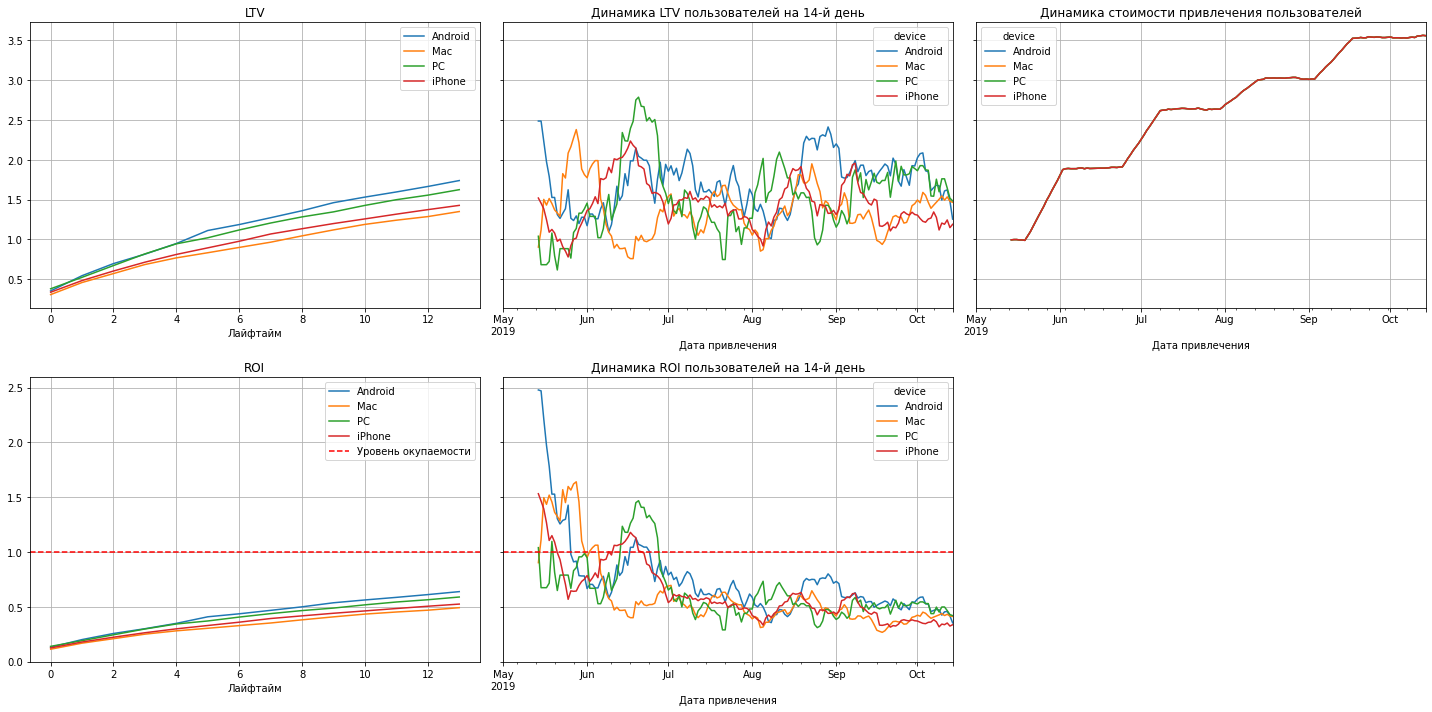

In [ ]:
prof_us_tiptop = prof_us.query('channel == "TipTop"')
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(prof_us_tiptop, orders, observation_date, horizon_date, dimensions = ['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=14)

Вывод:
    
LTV.
    
LTV сильно не меняется по устройству и в динамике. Показатели достаточно хороши

CAC.
        
Виден рост привлечения пользователей

ROI.
        
Окупаемость, а точнее ее отсутствие. До повышений цен еще кое-как окупалось, после повышения вообще ноль
        
Мы видим, что нет зависимость роста цен от устройства в США у TipTop

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

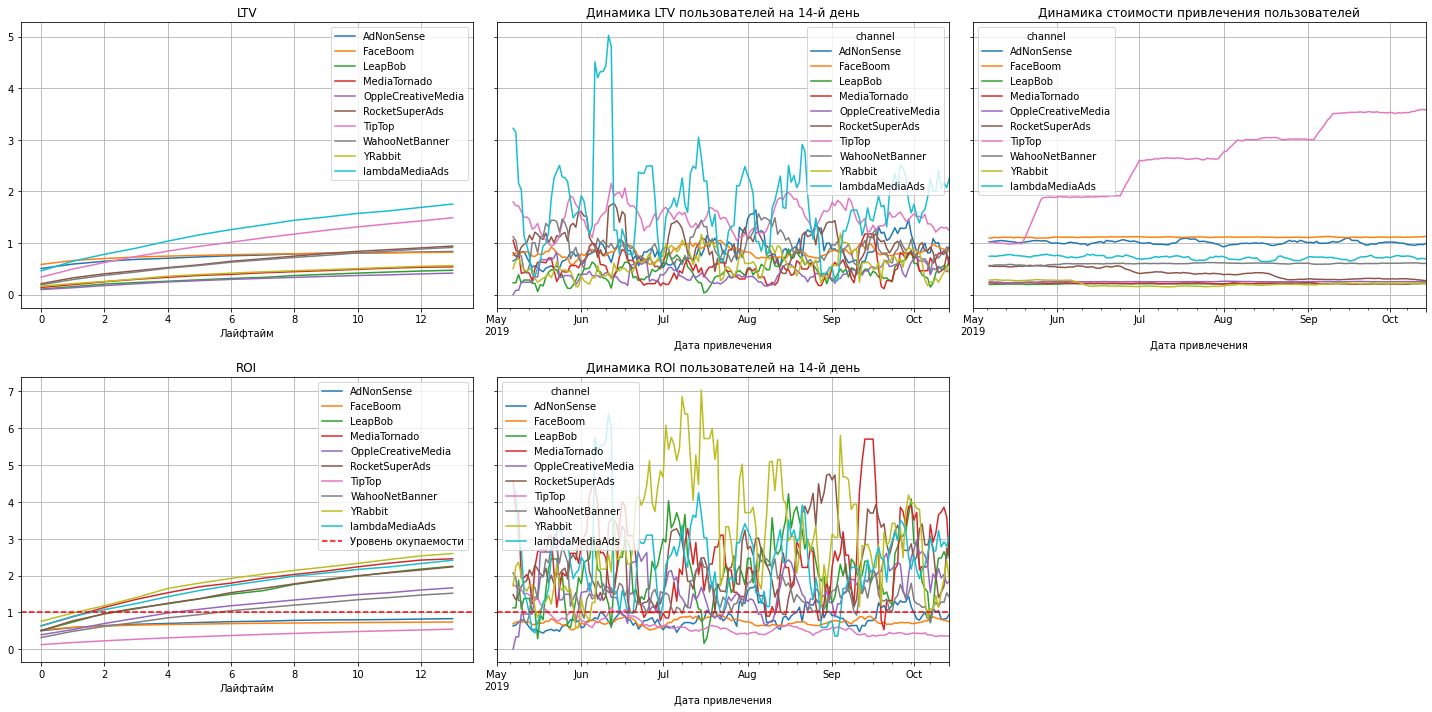

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_wo_org, orders, observation_date, horizon_date, dimensions = ['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_date, window=7)

Вывод:

LTV.
        
Если смотреть на графики LTV, то лучшие показатели удержания у lambdaMediaAds. У них самый лучший показатель LTV, второе место занимает TipTop. По динамике картина схожая.
    
CAC.
        
По стоимости привлечения пользователей у них средний показатель, что является хороший показателем. Дороже всего обходяся посетители от TipTop, причем со временем значения только растут.
    
ROI.

В целом большее количество агентсв окупают затраты на рекламу, кроме трех: TipTop, FaceBoom и AdNonSense. Самая лучшая окупаемость у YRabbit. По динамике за весь промежуток времени картина схожая. YRabbit имеет очень хорошие показатели. Большая часть рекламных компаний окупается. Плохие показатели у TipTop и FaceBoom

#### Ответьте на такие вопросы:
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?

Мы видим, что реклама у агенств в целом не окупается.
Этому есть несколько факторов:

1) TipTop и FaceBoom. Высокая стоимость привлечения. По ним мы видим большие траты, почти 80% ушло именно на эти два агентсва. Первое имело 4 роста цены на рынке США, что негативно сказалось на окупаемости. Второе имеет само по себе высокую цену привлечения пользователей. Средний САС у них выше среднего. Эти два агенства привлекли больше всего пользователей и покупателей, но этого все равно не хватает для того, чтобы отбить расходы на их услуги.

2) Проблема с удержанием пользователей. За 2 недели мы теряем почти всех наших неплатящих пользователей. С платящими пользователями в целом ситуация лучше, но есть куда расти. Только 10% покупателй остается с нами после 2 недель. AdNonSense и FaceBoom показывают худшие результаты удержания платящих пользователей.

3) Конверсия у агентств в целом хорошоая, кроме данных компаний: LeapBob, MediaTornado, YRabbit и WahooNetBanner. По ним наблюдаем сильные просадки. США имеет хорошие показатели конверсии, но платящие клиенты очень быстро уходят

В целом фактор устройства не сильно влияет на окупаемость. Так как рост произошел по всем устройствам, а не по конкретным. Пользователи Apple больше всех, почти 60%. Они больше всего платят, но их дороже всего привлекать. Лучше всего окупаются пользователи PC и привлекать их дешево.

Также хочется выделить lambdaMediaAds. У них хорошая цена на привлечение, почти 10% покупателей, окупаемость отличная. Это золотая середина.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Общий вывод:
   
   Мы имеем данные с мая по середину октября 2019 года. Представлены они в разрезе пользователей из разных стран, гаджетов и их различных агенств. Была проведена работа по предварительной обработке, проверке данных и последующее преобразование. Были составлены графики, для наглядности, где показаны данные в различных разрезах.
   
   Объектом исследования являются агенства, с которыми велось сотрудничество за данный период.
   
   Затраты по ним составили 105497 у.е. Большую часть ушло на два агенства: TipTop и FaceBoom. Рассмотрим их повнимательнее
    
   По странам хочется отметить США. У них случился рост цен на привлечение в июне 2019 года. Крайне дорого стало привлекать оттуда потенциальных покупателей. В целом их привлекать тяжело около 36% в первый день удержания платных пользователей. Но большая конверсия. В Европе более все стабильно. Окупаемость и цены отличные. Средняя конверсия, но эти пользователи задерживаются больше, чем те что из США. Особенно платящие, в первый день около 50%, а к концу второй недели около 18%.
   
   По гаджетам. В целом выделяются пользователи техники Apple. Она сама по себе дорогая и присутсвует большое количество покупаталей, привлеченных различными агенствами. Их дорого привлекать. Но почти 60% наших пользователей эт пользователи Apple.  
PC меньше всего, но самая большая окупаемость. Тратят они немного в количестве, но в сумме получается существенно. Цены на их привлечение самые низкие.
Android. Это среднячок по количеству пользователей и покупателей, но затраты на привлечение окупаются.

Рекомендации:
    
1) TipTop. Американское рекламное агенство, которое подняли 4 раза цены на свои услуги за год. Из-за этого пришлось очень много туда вложить денег, почти 50% от бюджета. Очень большая сумма была потрачена на услуги, по итогам которых, мы получили большой трафик, много покупателей, но все равно оказались в минусе. Слишком сильные были скачки роста цен.

2) FaceBoom. Это второе место по вложенным средствам. Мы имеем схожую картину с TipTop. Только цены у них были первоначально были высокие, намного выше конкурентов. Также много людей пришло и много совершили покупаки, но в целом работа в минус была проведена

3) Удерживаемость пользователей неплатящих по итогам 2 недель оказалась почти нулевой.

4) Удерживаемость пользователей платящих. AdNonSense и FaceBoom от них пришли пользователи, которые быстрее всего ушли от нас.

5) Европейский рынок имеет слабую конверсию, но он более стабильный, люди там платящие и задерживаются дольше. Окупаемость очень хорошоая и наступает буквально за пару дней. Следует обратить больше внимания на данный рынок